TODO:

<b>plot_basic_elements</b>
1. unsure what the "draw_frame" argument is? does it draw a frame around the legend or the entire plot? for now it doesn't do anything
2. we can remove the "legend_sig_figs" argument
3. for some reason pumps are no longer showing up? maybe the code is no longer reading them as elements different from pipes?

<b>plot_continuous_nodes</b>
1. (not urgent) for a parameter like pressure, we have to specify a value, and if we don't, the plot cannot be generated. can we throw up an error for this specific case that says "you have not specified a value?"
2. many more comments below (when we generate subplots)

In [2]:
import viswaternet as vis
import matplotlib.pyplot as plt

In [3]:
model = vis.VisWNModel('Networks/CTown.inp')

### Plot model with no predefined axis

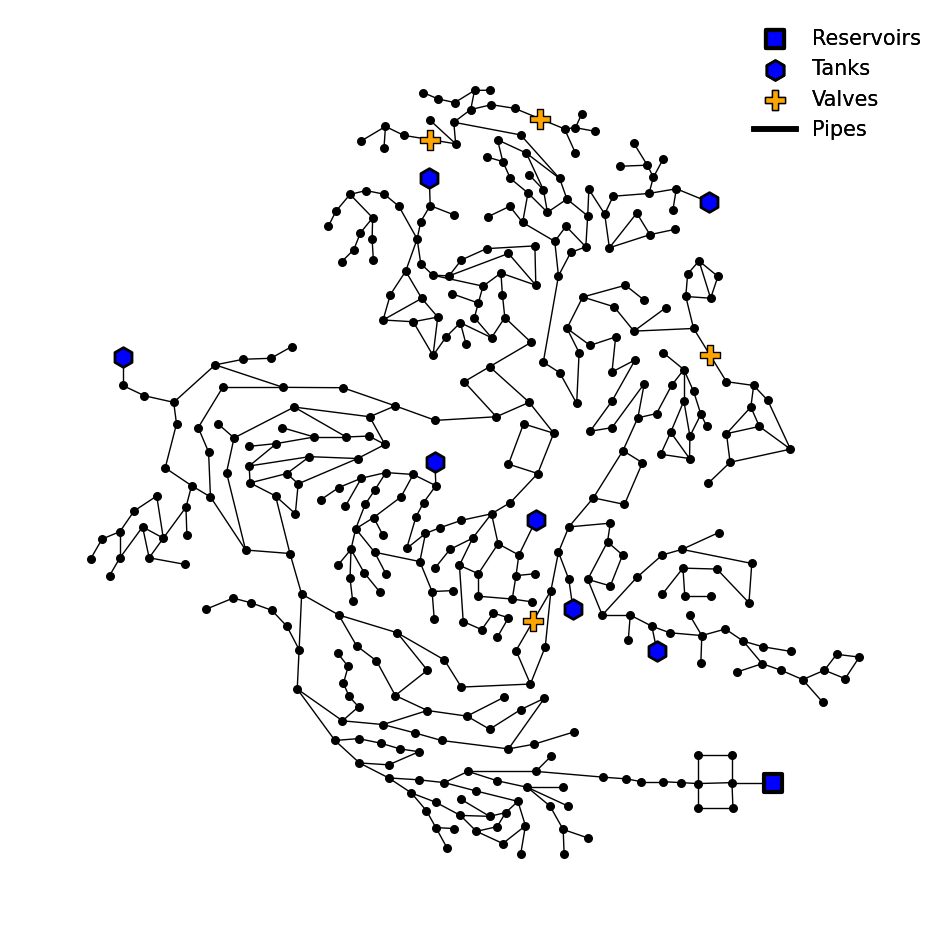

In [4]:
model.plot_basic_elements()

### Customize this plot!

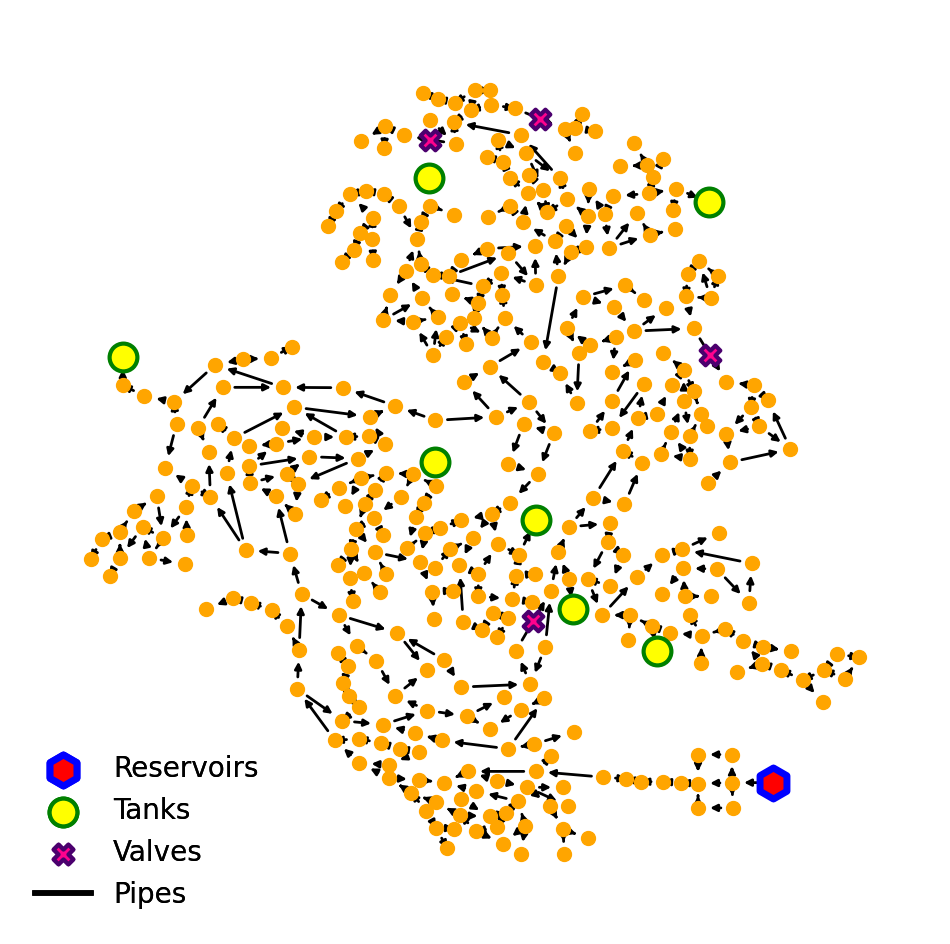

In [5]:
model.plot_basic_elements(
    nodes=True,
    links=True,
    reservoirs=True,
    tanks=True,
    pumps=True,
    valves=True,
    savefig=False,
    save_name=None,
    legend=True,
    base_legend_loc="lower left",
    font_size=20,
    font_color='k',
    legend_title_font_size=20,
                          
    draw_frame=True,                            # what does this input do?
    legend_sig_figs=3,                          # we don't need this input in the plot_basic_elements function
                          
    reservoir_size=500, reservoir_color='r', reservoir_shape='h',reservoir_border_color='b', reservoir_border_width=5,
    tank_size=400, tank_color='yellow', tank_shape='o', tank_border_color='g', tank_border_width=3,
    valve_size=200, valve_color='xkcd:hot pink', valve_shape='X', valve_border_color='xkcd:royal purple', valve_border_width=3,
                          
    pump_color='b', pump_width=3, pump_line_style='-', pump_arrows=False,  # this isn't working?
    
    base_node_color='orange', base_node_size=100, 
    base_link_color='k', base_link_width=2, base_link_line_style='-', base_link_arrows=True,)

### Plot within a predefined matplotlib axis

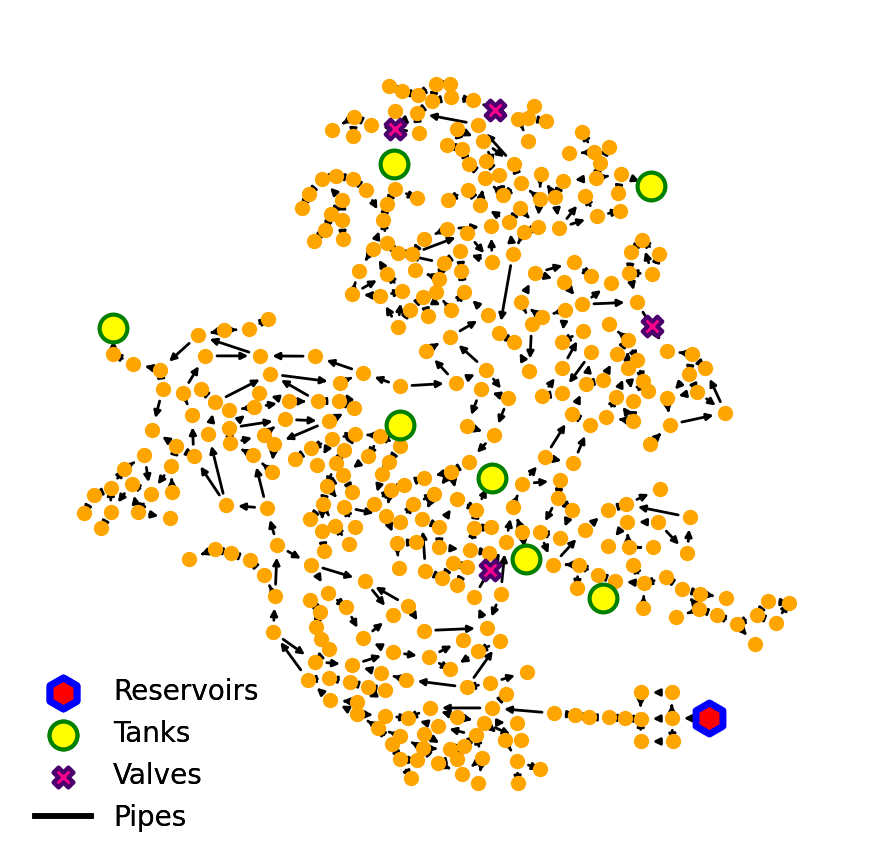

In [6]:
fig, ax = plt.subplots(figsize=(11,11))
ax.set_frame_on(False)

model.plot_basic_elements(ax=ax,
    nodes=True,
    links=True,
    reservoirs=True,
    tanks=True,
    pumps=True,
    valves=True,
    savefig=False,
    save_name=None,
    legend=True,
    base_legend_loc="lower left",
    font_size=20,
    font_color='k',
    legend_title_font_size=20,
                          
    draw_frame=True,                            # what does this argument do?
    legend_sig_figs=3,                          # we don't need this argument in the plot_basic_elements function
                          
    reservoir_size=500, reservoir_color='r', reservoir_shape='h',reservoir_border_color='b', reservoir_border_width=5,
    tank_size=400, tank_color='yellow', tank_shape='o', tank_border_color='g', tank_border_width=3,
    valve_size=200, valve_color='xkcd:hot pink', valve_shape='X', valve_border_color='xkcd:royal purple', valve_border_width=3,
                          
    pump_color='b', pump_width=3, pump_line_style='-', pump_arrows=False,  # this isn't working?
    
    base_node_color='orange', base_node_size=100, 
    base_link_color='k', base_link_width=2, base_link_line_style='-', base_link_arrows=True,)

# Ok! Moving on to continuous plots. Nodes first.

### Plot model with no predefined axis

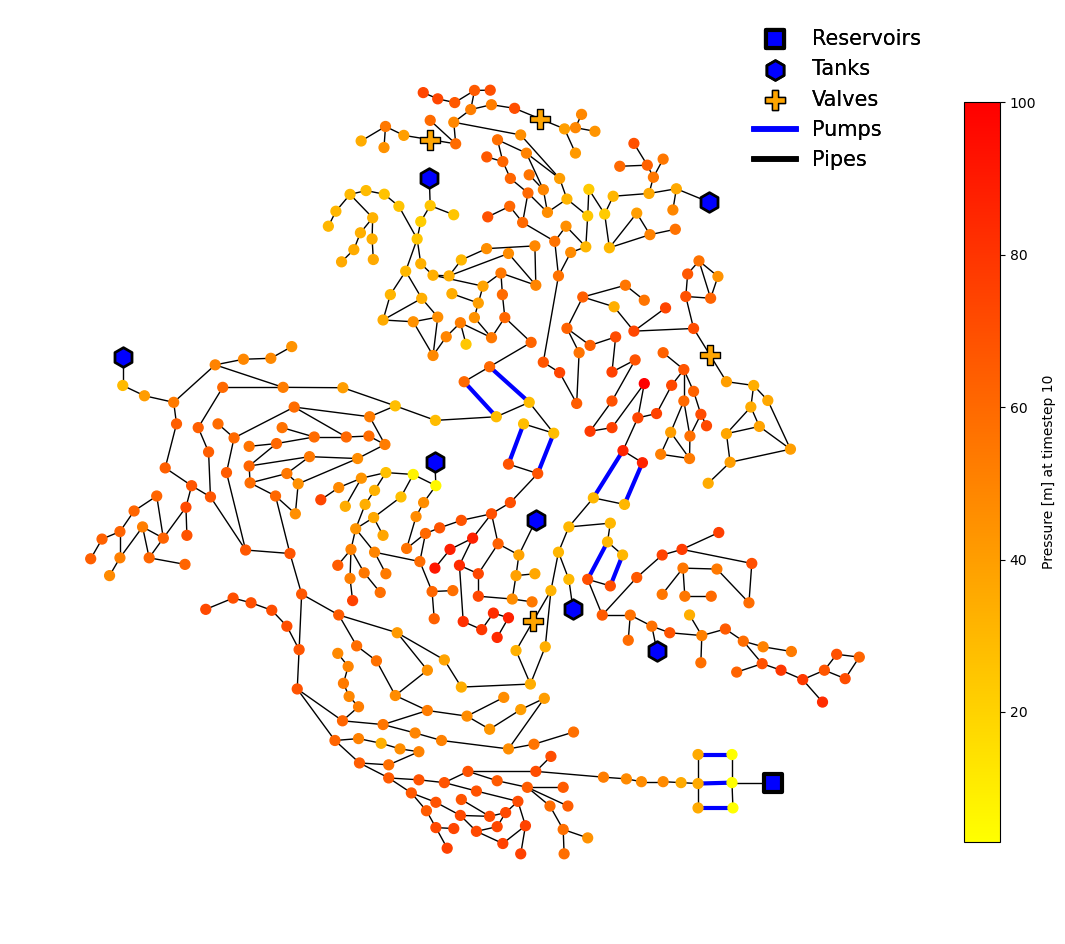

In [7]:
model.plot_continuous_nodes(parameter = "pressure", value = 10,
                            min_size = 200, max_size = 200)

### Plot on predefined axis and change up all arguments!

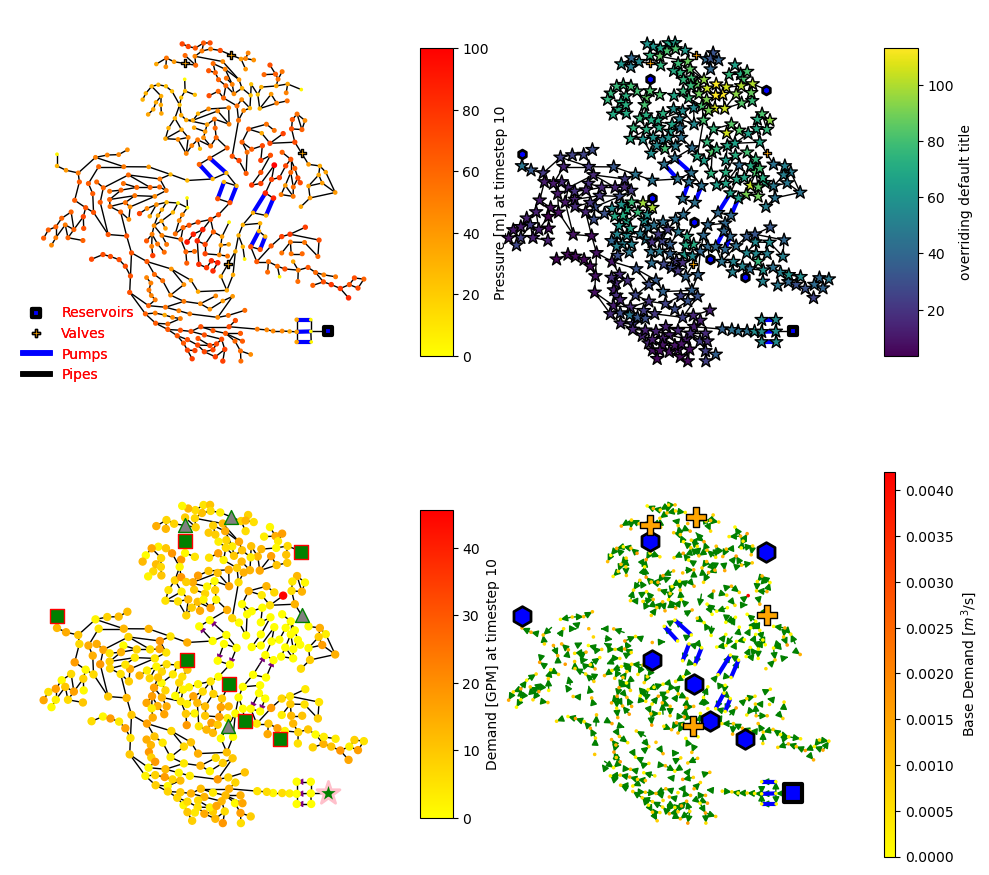

In [42]:
fig, ax = plt.subplots(2,2,figsize=(11,11))

ax[0][0].set_frame_on(False)
model.plot_continuous_nodes(ax=ax[0][0],parameter = "pressure", value = 10,
                            font_size=10, base_legend_loc = 'lower left',
                            min_size = 10, max_size = 40,
                            reservoir_size = 40, tank_size=40, valve_size=40,
                            pumps=True, 
 
                            get_tanks=True, get_reservoirs = True,        # what do these arguments do? do we need tanks=False for get_tanks = True to show up?
                                                                          # if yes that's totally fine, we should just inform users of this

                            tanks=False,
                            font_color='r',

                            legend_title_font_size=20,                     # we don't have a legend_title argument so we should delete this.
                           )

ax[0][1].set_frame_on(False)
model.plot_continuous_nodes(ax=ax[0][1],parameter = "elevation", 
                            font_size=10, legend= False,
                            
                            node_size=10,               # what does this argument do? we already have a min and max node size argument. can delete maybe
                            
                            reservoir_size = 40, tank_size=40, valve_size=40,
                            cmap = 'viridis',
                            color_bar_title ='overriding default title',
                            node_shape='*', edge_colors = 'k',
                            
                            line_widths=1,               # maybe this should be renamed to edge widths
                            
                            font_color='r',
                            legend_title_font_size=17,
                            draw_frame=False,
                            legend_sig_figs=3,           # no legend in a continuous plot: can delete?
                           
                           )

ax[1][0].set_frame_on(False)
model.plot_continuous_nodes(ax=ax[1][0],parameter = "demand", value = 10,
                            
                            unit = 'GPM',                # note to meghna: add easy to find "Units" tab in the docs
                            
                            legend = True,  
                            
                            element_size_intervals=[0,20,80],
                            element_size_legend_title=None,
                            element_size_legend_loc=None,
                            element_size_legend_labels=None,
                            
                            draw_base_legend=False,      # there is also legend argument! which one do we use?
                            
                            reservoir_size=300, reservoir_color='g', reservoir_shape='*', reservoir_border_color='pink',
                            reservoir_border_width=2,
                            
                            tank_size=100, tank_color='g', tank_shape='s', tank_border_color='r', tank_border_width=1,
                            
                            valve_size=100, valve_color='grey', valve_shape='^', valve_border_color='g', valve_border_width=1,
                            
                            pump_color='purple', pump_width=0.5, pump_line_style='-', pump_arrows=True,
                            
                            base_node_color='k', base_node_size=800,  # we should delete these two arguments! 
                            
                            )


ax[1][1].set_frame_on(False)
model.plot_continuous_nodes(ax=ax[1][1],parameter = "base_demand",
                            
                            draw_base_legend=False,      # there is also legend argument! can delete?
                            
                            min_size = 10, max_size = 10,
                            
                            base_link_color='g', base_link_width=1, base_link_line_style='-', base_link_arrows=True,                          
                            
                            draw_color_bar=True,
                            color_bar_width=0.01,
                            color_bar_height=1
                           )